In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/drive/MyDrive/dataset/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print("\nData Types: ")
print(data.dtypes)
data.columns


Data Types: 
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
#check for missing values in each column.

print("\nMissing Values: ")
print(data.isnull().sum())


Missing Values: 
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
print("\nSummary Statistics: ")
print(data.describe())


Summary Statistics: 
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.00

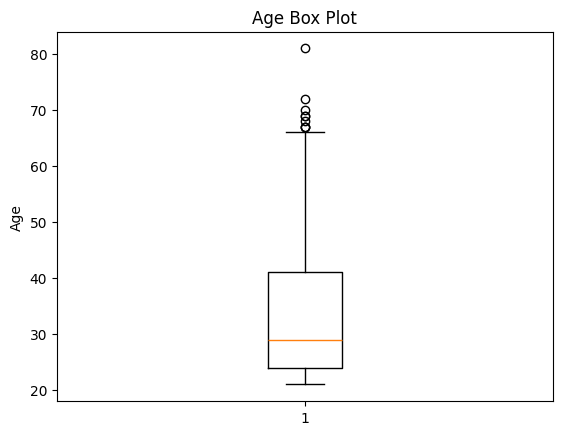

In [6]:
#Build box plots within appropriate columns
import matplotlib.pyplot as plt
plt.boxplot(data['Age'])
plt.title('Age Box Plot')
plt.ylabel('Age')
plt.show()

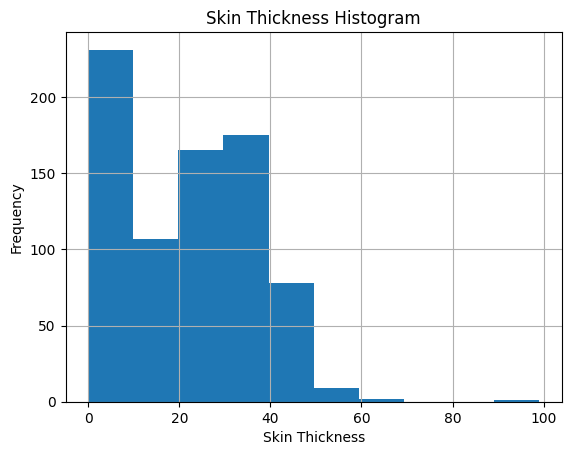

In [7]:
#Build histogram appropriate columns
data['SkinThickness'].hist()
plt.title('Skin Thickness Histogram')
plt.xlabel('Skin Thickness')
plt.ylabel('Frequency')
plt.show()

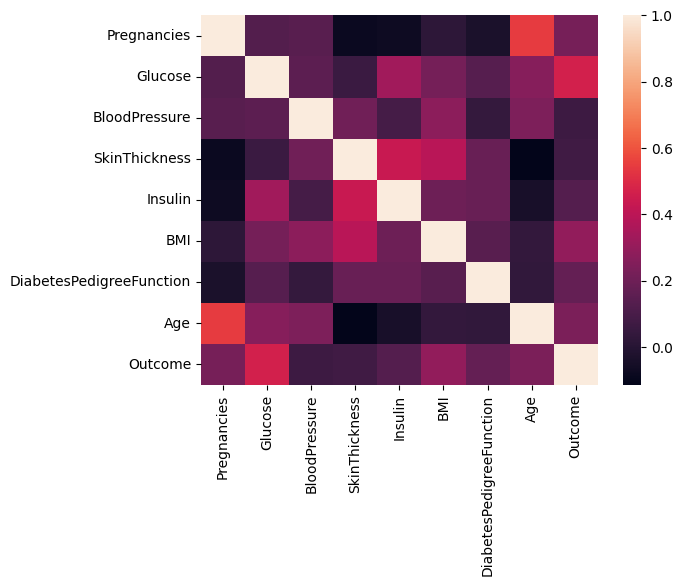

In [8]:
#Build heatmaps for appropriate columns
import seaborn as sns
sns.heatmap(data.corr())
plt.show()

In [11]:
#Feature selection

import pandas as pd
import numpy as np # Changed pd to np

#load the dataset
data = pd.read_csv('/content/drive/MyDrive/dataset/diabetes.csv')

#Display the first few roes of the dataset to understand its structure
print(data.head())

#separate the features and target variable
X = data.drop(columns = ['Outcome']).values
y = data['Outcome'].values

#check the shapes of x and y
print("The shape of X: ",X.shape)
print("The shape ofY: ",y.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
The shape of X:  (768, 8)
The shape ofY:  (768,)


In [13]:
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    """
    Splits dataset into train and test sets.

    Arguments:
    X : np.ndarray
        Feature matrix.
    y : np.ndarray
        Target array.
    test_size : float
        Proportion of the dataset to include in the test split (0 < test_size < 1).
    random_seed : int
        Seed for reproducibility.

    Returns:
    X_train, X_test, y_train, y_test : np.ndarray
        Training and testing splits of features and target.
    """
    # Moved np.random.seed inside the function
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0]) # Changed arrange to arange
    np.random.shuffle(indices)

    test_split_size = int(len(X) * test_size) # Changed len[X] to len(X)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]

    x_train = X[train_indices]
    x_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]

    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3, random_seed=42)

print("The shape of X_train: ", x_train.shape)
print("The shape of X_test: ", x_test.shape)
print("The shape of y_train: ", y_train.shape)
print("The shape of y_test: ", y_test.shape)

The shape of X_train:  (538, 8)
The shape of X_test:  (230, 8)
The shape of y_train:  (538,)
The shape of y_test:  (230,)


In [17]:
import numpy as np

def euclidean_distance(x1, x2):
    """
    Calculate the Euclidean distance between two points in n-dimensional space.

    Arguments:
    x1 : np.ndarray
        The first point as a numpy array.
    x2 : np.ndarray
        The second point as a numpy array.

    Returns:
    float
        The Euclidean distance between the two points.

    Raises:
    ValueError: If the input points do not have the same dimensionality.
    """
    if x1.shape != x2.shape:
        raise ValueError("The input points must have the same dimensionality.")

    distance = np.sqrt(np.sum((x1 - x2)**2))
    return distance

In [18]:
try:
  x1 = np.array([3,4])
  x2 = np.array([0,0])

  distance = euclidean_distance(x1, x2)
  expected_distance = 5.0

  assert np.isclose(distance, expected_distance), f"Expected {expected_distance}, but got {distance}"
  print("Test passed!")
except ValueError as e:
  print(f"ValueError: {e}")
except AssertionError as ae:
  print(f"AssertionError: {ae}" )
except Exception as ve:
  print(f"An unexpected error occurred: {ve}")

Test passed!


In [20]:
def knn_predict_single(x_train, y_train, x_test, k=3):
  """
  Predict the class label for a single query using the K-nearest neighbors algorithm.

  Arguments:
  query : np.ndarray
      The query point for which the prediction is to be made.
  X_train : np.ndarray
      The training feature matrix.
  y_train : np.ndarray
      The training labels.
  k : int, optional
      The number of nearest neighbors to consider (default is 3).

  Returns:
  int
      The predicted class label for the query.
  """

  distances = [euclidean_distance(x_test, x) for x in x_train] # Fixed: Removed extra indentation and used x_test instead of query

  sorted_indices = np.argsort(distances)

  nearest_indices = sorted_indices[:k]

  nearest_labels = y_train[nearest_indices]

  prediction = np.bincount(nearest_labels).argmax()

  return prediction

In [22]:
def knn_predict(x_train, y_train, x_test, k=3):
    """
    Predict the class labels for all test samples using the K-nearest neighbors algorithm.

    Arguments:
    X_test : np.ndarray
        The test feature matrix.
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    k : int, optional
        The number of nearest neighbors to consider (default is 3).

    Returns:
    np.ndarray
        An array of predicted class labels for the test samples.
    """
    predictions = [knn_predict_single(x_train, y_train, x, k) for x in x_test] # Fixed: Removed extra indentation
    return np.array(predictions)

In [28]:
try:
    x_test_sample = x_test[:5]
    y_test_sample = y_test[:5]

    predictions = knn_predict(x_train, y_train, x_test_sample, k=3)

    print("Predictions:", predictions)
    print("Actual Labels:", y_test_sample)

    assert predictions.shape == y_test_sample.shape, "The shape of predictions and y_test_sample must be the same."

    print("Test case passed")
except AssertionError as ae:
    print(f"AssertionError: {ae}")

except Exception as e:
    print(f"An unexpected error occurred: {e}")

Predictions: [0 1 0 1 1]
Actual Labels: [0 0 0 0 0]
Test case passed


Accuracy for k=1: 68.70%
Accuracy for k=2: 72.61%
Accuracy for k=3: 67.39%
Accuracy for k=4: 72.17%
Accuracy for k=5: 68.70%
Accuracy for k=6: 70.00%
Accuracy for k=7: 69.13%
Accuracy for k=8: 71.30%
Accuracy for k=9: 70.00%
Accuracy for k=10: 71.74%
Accuracy for k=11: 73.04%
Accuracy for k=12: 73.91%
Accuracy for k=13: 74.35%
Accuracy for k=14: 72.61%
Accuracy for k=15: 73.91%
Accuracy for k=16: 73.48%
Accuracy for k=17: 72.61%
Accuracy for k=18: 71.30%
Accuracy for k=19: 72.17%
Accuracy for k=20: 70.87%


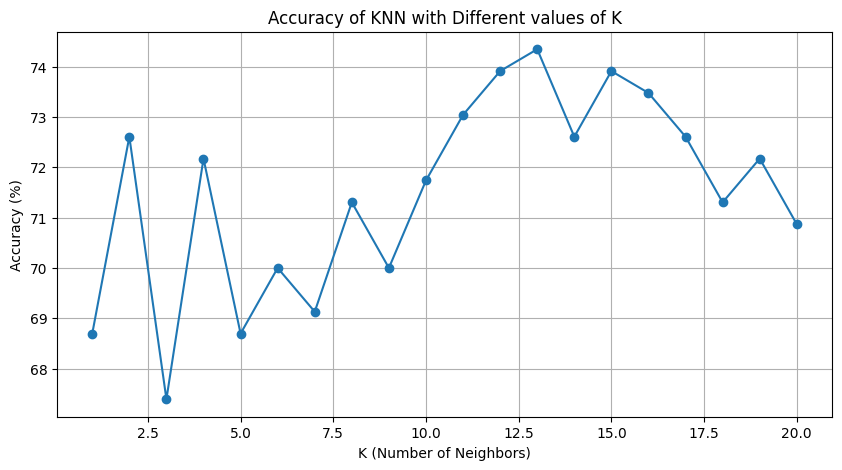

Experiment completed successfully.


In [30]:
import numpy as np
import matplotlib.pyplot as plt

def compute_accuracy(y_true, y_pred):
    """
    Calculate the accuracy of predictions.

    Arguments:
    y_true : np.ndarray
        The true labels.
    y_pred : np.ndarray
        The predicted labels.

    Returns:
    float
        The accuracy of the predictions.
    """
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

def experiment_knn_k_values(x_train, y_train, x_test, y_test, k_values):
    """
    Run KNN predictions for different values of k and plot the accuracies.

    Arguments:
    x_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    x_test : np.ndarray
        The test feature matrix.
    y_test : np.ndarray
        The test labels.
    k_values : list of int
        A list of k values to experiment with.

    Returns:
    dict
        A dictionary with k values as keys and their corresponding accuracies as values.
    """
    accuracies = {}

    for k in k_values:
        predictions = knn_predict(x_train, y_train, x_test, k)
        accuracy = compute_accuracy(y_test, predictions)
        accuracies[k] = accuracy
        print(f"Accuracy for k={k}: {accuracy:.2f}%")  # Moved into the loop for each k

    plt.figure(figsize=(10, 5))
    plt.plot(list(accuracies.keys()), list(accuracies.values()), marker='o')
    plt.xlabel('K (Number of Neighbors)')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy of KNN with Different values of K')
    plt.grid(True)
    plt.show()

    return accuracies

# Correct the range definition
k_values = range(1, 21)

try:
    # Ensure that the variables below are defined before calling this function
    accuracies = experiment_knn_k_values(x_train, y_train, x_test, y_test, k_values)
    print("Experiment completed successfully.")

except Exception as e:
    print(f"An error occurred during the experiment: {e}")